# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [2]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

#### Visualize data

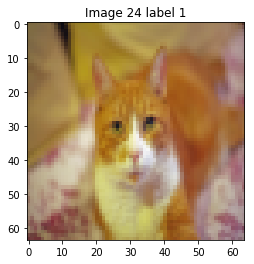

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [3]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [4]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [5]:
train_x = train_x/255.
test_x = test_x/255.

### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model:
- A function **initialize_parameters** that randomly initializes the model's weights with small values. The number of the weights corresponds to the dimension of the input (size of the image)
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, weights and biases computes the output of the single neuron model

In [6]:
def sigmoid(z):
    sigm = 1/(1+np.exp(-z))
    return sigm

In [7]:
def initialize_parameters(dim):
    w = np.random.randn(dim)*0.01  # (12288,1)
    b = 0
    return w, b

In [8]:
def neuron(w, b, X):
    pred_y = sigmoid(np.dot(w.T, X) + b)  # (1, 12288) (12288, 209)
    return pred_y

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [9]:
dim_x = train_x.shape[0]
w, b = initialize_parameters(dim_x)
pred_y = neuron(w, b, train_x)
# print('pred_y:', pred_y)
# print(pred_y)
# print(train_y)
print('shape of pred_y is', pred_y.shape)
print('shape of train_y is', train_y.shape)
train_y_sq = np.squeeze(train_y)
print('shape of train_y_sq', train_y_sq.shape)

shape of pred_y is (209,)
shape of train_y is (1, 209)
shape of train_y_sq (209,)


In [10]:
# print(pred_y)
# print(train_y)

**c) Cost estimation:**
 
We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m 
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}
 
 The following cross-entropy function should give as result the scalar cost value computed over the entire dataset

In [11]:
def crossentropy(Y, Ypred):
    m = Y.shape[0]
    # print('m is', m)
    # sum = 0
    # for i in range(m):
        # print(i)
        # sum += (Y[i]*np.log(Ypred[i])+(1-Y[i])*np.log(1 - Ypred[i])) 
    # cost = -1/m * sum
    cost =  (-1/m)* np.sum(Y*np.log(Ypred)+(1-Y)*np.log(1-Ypred))
    return cost

cost = crossentropy(train_y_sq,pred_y)
print('The cost is', cost)

The cost is 0.656557067512442


**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = & \frac{1}{m} X(Y_{\rm pred}-Y)^T\\
\frac{\partial E}{\partial b} = & \frac{1}{m} (Y_{\rm pred}-Y)\\
\end{align}

See a demonstration of how the gradient was computed in 
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.

In [12]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]
    
    #find gradient (back propagation)
    dw = (1/m)*(np.dot(X,(Ypred-Y).T))
    db = (1/m)*np.sum(Ypred-Y)
    grads = {"dw": dw,
             "db": db} 
    
    return grads

**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [13]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(train_x.shape[0])
    Y_sq = np.squeeze(Y)
    for i in range(iterations):
        Ypred = neuron(w, b, X)
        cost = crossentropy(Y_sq, Ypred)
        grads =  backpropagate(X, Y_sq, Ypred)
        #print('grads is', grads)
        #print('shape of w is', w.shape)
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
       
    return w, b, costs

w, b, costs = gradient_descent(train_x,train_y,iterations=2000, learning_rate = 0.005)
print('shape of w is', w.shape)
print('shape of b is', b.shape)

Cost after iteration 0: 0.654947
Cost after iteration 100: 0.586260
Cost after iteration 200: 0.469089
Cost after iteration 300: 0.378092
Cost after iteration 400: 0.332949
Cost after iteration 500: 0.304514
Cost after iteration 600: 0.280941
Cost after iteration 700: 0.260966
Cost after iteration 800: 0.243755
Cost after iteration 900: 0.228729
Cost after iteration 1000: 0.215470
Cost after iteration 1100: 0.203666
Cost after iteration 1200: 0.193078
Cost after iteration 1300: 0.183521
Cost after iteration 1400: 0.174846
Cost after iteration 1500: 0.166933
Cost after iteration 1600: 0.159684
Cost after iteration 1700: 0.153019
Cost after iteration 1800: 0.146868
Cost after iteration 1900: 0.141175
shape of w is (12288,)
shape of b is ()


**e) Plot the training curve**
Plot the evolution of the cost vs the iterations 

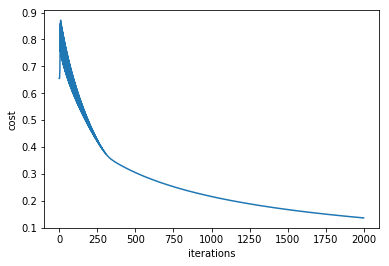

In [14]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [15]:
def predict(w, b, X):    
    y_pred = neuron(w, b, X)
    return y_pred

# predict 
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
# print(test_pred_y.shape)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))

Train Acc: 88.05138550140933 %
Test Acc: 64.99192270096373 %


In [16]:
round(train_x.shape[0]*0.1)

1229

**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe

In [17]:
def gradient_descent_early_stopping(X, Y, iterations, learning_rate, percentage):
    # split data to training set and validation set
    Y = np.squeeze(Y)
    train_acc = np.zeros(1000)
    val_acc = np.zeros(1000)
    print(X.shape[0]*percentage)
    print(len(Y)*percentage)
    X_train = X[:, :-round(X.shape[1]*percentage)]
    print(-round(X.shape[1]*percentage))
    X_val = X[:, -round(X.shape[1]*percentage):]
    y_train = Y[:-round(len(Y)*percentage)]
    y_val = Y[-round(len(Y)*percentage):]
    print('shape of X_train is', X_train.shape)
    print('shape of X_val is', X_val.shape)
    print('shape of y_train is', y_train.shape)
    print('shape of y_val is', y_val.shape)
    train_costs = []
    val_costs = []
    lr_list = []
    iter_list = []
    train_acc_list = []
    val_acc_list = []
    best_acc = 0
    best_train_costs = []
    w, b = initialize_parameters(X_train.shape[0])
    # learning_rate = [0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.5, 0.8]
    # iterations: 100 to 2550
    for lr in learning_rate:
        print("learning rate =", lr)
        for j in range(50):  # we can change j to control the iterations, when we want to fix the iteration, just need to change j to 1
        #for j in range(1):
            print(j)
            lr_list.append(lr)
            iter_list.append(iterations)            
            for i in range(iterations):
                y_pred = neuron(w, b, X_train)
                cost = crossentropy(y_train, y_pred)
                grads =  backpropagate(X_train, y_train, y_pred)
                #print('grads is', grads)
                #print('shape of w is', w.shape)
                #update parameters
                w = w - lr * grads["dw"]
                b = b - lr * grads["db"]
                train_costs.append(cost)
            y_pred_val = predict(w, b, X_val)
            # cost_val = crossentropy(y_val, y_pred_val)
            train_acc = (100 - np.mean(np.abs(y_pred - y_train)) * 100)
            val_acc = (100 - np.mean(np.abs(y_pred_val - y_val)) * 100)
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            # if val_acc > best_acc, update best_w and best_b
            if val_acc > best_acc:
                best_w = w
                best_b = b
                best_acc = val_acc
                best_iter = iterations
                best_lr = lr
                best_train_costs = train_costs
            iterations = iterations + 50 # we need to comment this line if we want to iterations to be fixed
            train_costs = []
    
    return best_w, best_b, best_train_costs, best_acc, best_iter, best_lr, lr_list, iter_list, train_acc_list, val_acc_list

In [18]:
#learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
learning_rate = [0.005]
iteration_initial = 100
percentage = 0.1
# best_w, best_b, train_costs, val_costs = gradient_descent_early_stopping(train_x, train_y, iteration_initial, learning_rate, percentage)
best_w, best_b, best_train_costs, best_acc, best_iter, best_lr, lr_list, iter_list, train_acc_list, val_acc_list = gradient_descent_early_stopping(train_x, train_y, iteration_initial, learning_rate, percentage)

1228.8000000000002
20.900000000000002
-21
shape of X_train is (12288, 188)
shape of X_val is (12288, 21)
shape of y_train is (188,)
shape of y_val is (21,)
learning rate = 0.005
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


best iter: 200
best val accuracy: 55.98159821112571


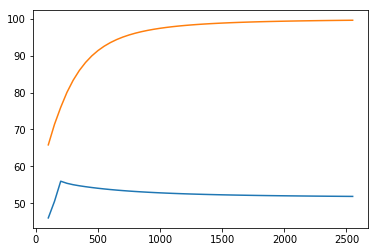

In [ ]:
plt.plot(iter_list, val_acc_list, iter_list, train_acc_list)
#print("train_acc_list:", train_acc_list)
#print("val_acc_list:", val_acc_list)
#print("iter list:", iter_list)
#print("learning rate list:", lr_list)
print("best iter:", best_iter)
print("best val accuracy:", best_acc)

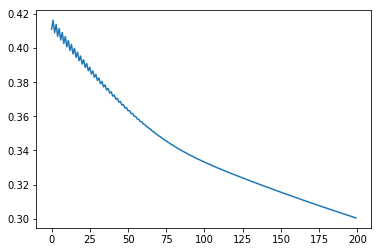

In [ ]:
plt.plot(best_train_costs)
#print(best_train_costs)

In [ ]:
#before run this cell, we need to change the j in gradient_descent_early_stopping function to be 1.
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
#learning_rate = [0.005]
iteration_initial = 500
percentage = 0.1
# best_w, best_b, train_costs, val_costs = gradient_descent_early_stopping(train_x, train_y, iteration_initial, learning_rate, percentage)
best_w, best_b, best_train_costs, best_acc, best_iter, best_lr, lr_list, iter_list, train_acc_list, val_acc_list = gradient_descent_early_stopping(train_x, train_y, iteration_initial, learning_rate, percentage)

1228.8000000000002
20.900000000000002
-21
shape of X_train is (12288, 188)
shape of X_val is (12288, 21)
shape of y_train is (188,)
shape of y_val is (21,)
learning rate = 0.001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
learning rate = 0.005
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
learning rate = 0.01
0
1
2
3
4


In [ ]:
plt.plot(lr_list, val_acc_list, lr_list, train_acc_list)
print("train_acc_list:", train_acc_list)
print("val_acc_list:", val_acc_list)
print("iter list:", iter_list)
print("learning rate list:", lr_list)
print("best learning rate:", best_lr)
print("best val accuracy:", best_acc)

In [ ]:
plt.plot(best_train_costs)
#print(best_train_costs)

### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [ ]:
# import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [ ]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

In [ ]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T


In [ ]:
#build the model
input_shape = x_train.shape[1:] # resize the input shape
print(input_shape)
num_classes = 2
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)


model.summary()

In [ ]:
y_train = np.squeeze(y_train.T) # change the input shape to each image 3 dims
y_train = keras.utils.to_categorical(y_train, num_classes) # code the target

y_test = np.squeeze(y_test.T) # change the shape
y_test = keras.utils.to_categorical(y_test, num_classes) # code the target

In [ ]:
#comiple and fit
batch_size = 128
epochs = 15





model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=188, epochs=epochs, validation_split=0.1)

In [ ]:
#evaluate
#evaluate

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients



In [ ]:
# import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import h5py

model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Own tensorflow implementation
optimizer = tf.keras.optimizers.Adam()

loss_fn = tf.keras.losses.BinaryCrossentropy()



epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
train_accuracy = tf.keras.metrics.Accuracy()


epoch_loss_avg_test = tf.keras.metrics.Mean('test_loss')
test_accuracy = tf.keras.metrics.Accuracy()

def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = loss_fn(labels, pred)
    grads = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg(loss_step)
    train_accuracy(labels, tf.cast(pred > 0.5, tf.int32))

def test_step(model ,images,labels):
    pred = model.predict(images)
    loss_step = loss_fn(labels, pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels,tf.cast(pred > 0.5, tf.int32))


train_loss_results = []
train_acc_results = []

test_loss_results = []
test_acc_results = []

num_epochs = 30
batch_size = 128


x_train, y_train, x_test, y_test, classes=load_dataset()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = y_train.T
y_test = y_test.T

y_train = np.squeeze(y_train.T) # change the input shape to each image 3 dims
y_train = keras.utils.to_categorical(y_train, num_classes) # code the target

y_test = np.squeeze(y_test.T) # change the shape
y_test = keras.utils.to_categorical(y_test, num_classes) # code the target


for each in range(num_epochs):
    train_step(model, x_train, y_train)
    print('.', end='')
    train_loss_results.append(epoch_loss_avg.result())
    train_acc_results.append(train_accuracy.result())
        
    test_step(model, x_test, y_test)
    test_loss_results.append(epoch_loss_avg_test.result())
    test_acc_results.append(test_accuracy.result())
    print()
    print('Epoch:{}:loss:{:.3f}, accuracy:{:.3f}, test_loss:{:.3f}, test_accuracy:{:.3f}'.format(
        each+1,
        epoch_loss_avg.result(),
        train_accuracy.result(),
        epoch_loss_avg_test.result(),
        test_accuracy.result()
    ))# print the result
    epoch_loss_avg.reset_states()
    train_accuracy.reset_states()
    epoch_loss_avg_test.reset_states()
    test_accuracy.reset_states()

